# Identify Parachutes

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk
from skimage import morphology
from skimage.segmentation import clear_border

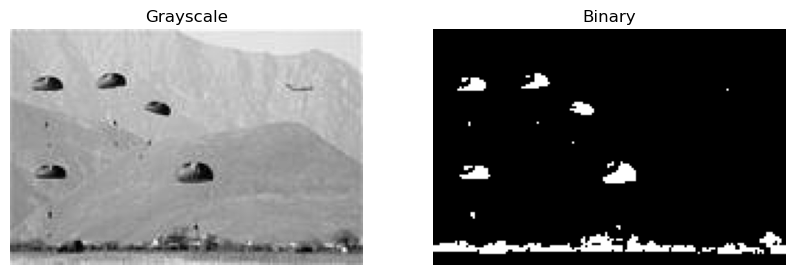

In [2]:
parachutes = cv2.imread("./images/parachutesGS.jpg", cv2.IMREAD_GRAYSCALE)
parachutes_binary = parachutes < 90

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(parachutes, cmap='gray')
axs[0].set_title("Grayscale")
axs[0].axis('off')
axs[1].imshow(parachutes_binary, cmap='gray')
axs[1].set_title("Binary")
axs[1].axis('off')
plt.show()

We can create a neighborhood, or structuring element. There are many different shapes we can choose. For a disk, we can use the [disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function.

In [3]:
structuring_element = disk(7)

A closing operation emphasizes bright spots. In a binary image, that means foreground is emphasized. It can be used to fill out indentations in a segmentation. We can use the [morphologyEx(op=cv2.MORPH_CLOSE)](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) function.

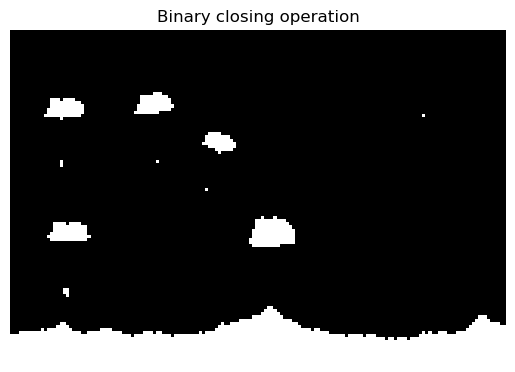

In [4]:
parachutes_binary_close = cv2.morphologyEx(parachutes_binary.astype(np.uint8), cv2.MORPH_CLOSE, structuring_element)

plt.imshow(parachutes_binary_close, cmap='gray')
plt.title("Binary closing operation")
plt.axis('off')
plt.show()

The bright sides of the parachutes are more filled out in the segmentation, but there is still a bit of noise where the boxes are hanging and from the airplane. We can remove them with [remove_small_objects()](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects) function.

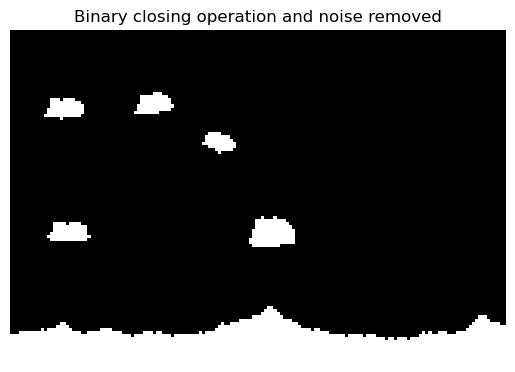

In [5]:
parachutes_binary_close_clean = morphology.remove_small_objects(parachutes_binary_close.astype('bool'), 20)

plt.imshow(parachutes_binary_close_clean, cmap='gray')
plt.title("Binary closing operation and noise removed")
plt.axis('off')
plt.show()

The land at the bottom touches the border. We can remove foreground touching the border with [clear_border()](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.clear_border) function.

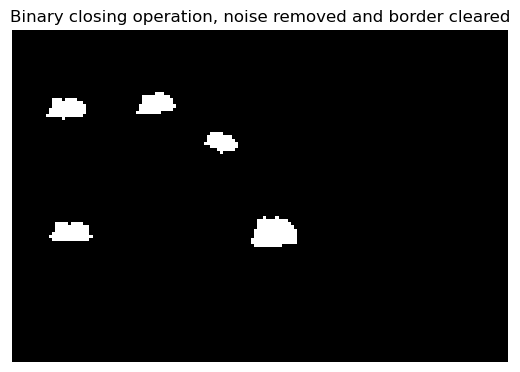

In [6]:
parachutes_binary_close_clean_clear = clear_border(parachutes_binary_close_clean)

plt.imshow(parachutes_binary_close_clean_clear, cmap='gray')
plt.title("Binary closing operation, noise removed and border cleared")
plt.axis('off')
plt.show()